# Practice Peer-graded Assignment: Visualization and Imputation

## Instructions

Now that you've learned about summarizing information with data visualization and handling missing data with imputation, it's time to apply these skills to a real-world case.

With the summary and dataset from the previous section (Getting Started with the Case Study), your first challenge is to:

* Investigate the extent and nature of the missing data
* Design and implement an imputation technique for the missing data
* Produce a visualization for AAVAIL stakeholders on the US and Singapore markets using your modified dataset

## Question 1
Investigate the new dataset and upload a visualization or multiple visualizations that summarize the nature and extent of the missing data. Be sure to include text to make your visualization clearer. Hint: You can add multiple plots to one figure in Python with matplotlib using the [.subplots method](https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html)

### Grading criteria
* Did the learner upload at least one visualization related to the nature and extent of the missing data in the new AAVAIL dataset?
* Did the learner add labels, titles, and/or other elements to help make their visualization(s) clearer?

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
data_1 = pd.read_csv('aavail-data-visualization.csv')

In [87]:
data_1.describe()

,customer_id,age,num_streams
count,1000.000000,1000.000000,954.000000
mean,500.500000,27.532000,17.780922
std,288.819436,9.120096,4.752115
min,1.000000,14.000000,1.000000
25%,250.750000,21.000000,15.000000
50%,500.500000,24.000000,19.000000
75%,750.250000,33.000000,21.000000
max,1000.000000,57.000000,29.000000


In [88]:
data_1.info

<bound method DataFrame.info of      customer_id   country_name   age     customer_name  is_subscriber  \
0              1  united_states  21.0        Kasen Todd           True   
1              2      singapore  31.0      Ensley Garza          False   
2              3  united_states  22.0     Lillian Carey          False   
3              4  united_states  21.0  Beau Christensen           True   
4              5      singapore  22.0    Ernesto Gibson           True   
..           ...            ...   ...               ...            ...   
995          996      singapore  55.0   Peyton Enriquez          False   
996          997  united_states  23.0     Amina Manning           True   
997          998  united_states  25.0    Brooks Ventura           True   
998          999  united_states  40.0     Nayeli Mathis           True   
999         1000  united_states  21.0        Cole Solis           True   

      subscriber_type  num_streams  
0      aavail_premium         23.0  
1    

#### Missing Value Exploration

In [89]:
print("Missing Value Summary:" )
data_1.isnull().sum()

Missing Value Summary:


customer_id         0
country_name        0
age                 0
customer_name       0
is_subscriber       0
subscriber_type    72
num_streams        46
dtype: int64

***From initial exploration, we can infer there are 2 columns to have missing value:***
1. subscriber_type : 72 missing value
2. num_streams : 46 missing value***

In [90]:
data_1.head()

,customer_id,country_name,age,customer_name,is_subscriber,subscriber_type,num_streams
0,1,united_states,21.0,Kasen Todd,True,aavail_premium,23.0
1,2,singapore,31.0,Ensley Garza,False,NaN,12.0
2,3,united_states,22.0,Lillian Carey,False,aavail_premium,22.0
3,4,united_states,21.0,Beau Christensen,True,aavail_basic,19.0
4,5,singapore,22.0,Ernesto Gibson,True,aavail_premium,23.0


#### Visualization

In [91]:
data_usa = data_1[data_1['country_name']] = 'united_states'
data_sg = data_1[data_1['country_name']] = 'singapore'


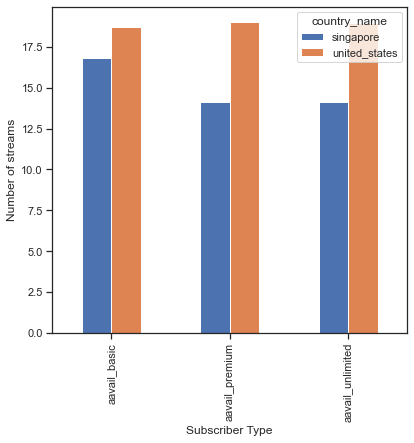

In [92]:
from IPython.display import Image

fig = plt.figure(figsize = (14,6))
ax1 = fig.add_subplot(121)

data_nan = pd.pivot_table(data_1, index = 'subscriber_type', columns = 'country_name',values = 'num_streams')
data_nan.plot(kind = 'bar', ax = ax1)
ax1.set_xlabel("Subscriber Type");
ax1.set_ylabel("Number of streams");

Visualize missing value

In [93]:
#total data
total_cust = data_1.shape[0]
data_subs_nan = data_1[data_1['subscriber_type'].isna()].shape[0]
data_nums_nan = data_1[data_1['num_streams'].isna()].shape[0]

#USA fraction
cust_usa = data_1[data_1['country_name']=="united_states"].shape[0]
subs_nan_usa = data_1[data_1['subscriber_type'].isna()][data_1['country_name']=='united_states'].shape[0]
nums_nan_usa = data_1[data_1['num_streams'].isna()][data_1['country_name']=='united_states'].shape[0]

#Singapore Fraction
cust_sg = data_1[data_1['country_name']=="singapore"].shape[0]
subs_nan_sg = data_1[data_1['subscriber_type'].isna()][data_1['country_name']=='singapore'].shape[0]
nums_nan_sg = data_1[data_1['num_streams'].isna()][data_1['country_name']=='singapore'].shape[0]

print(subs_nan_usa)
print(nums_nan_usa)
print(subs_nan_sg)
print(nums_nan_sg)

51
24
21
22


C:\Users\iqbal\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\iqbal\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\iqbal\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]
C:\Users\iqbal\anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


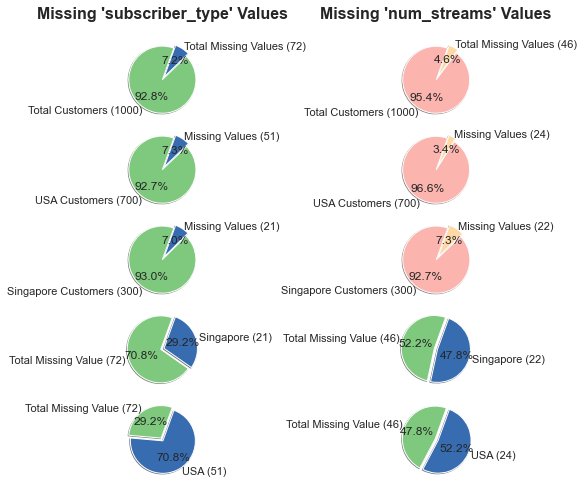

In [94]:
# Missing data visualization
labels1 = f'Total Customers ({total_cust})', f'Total Missing Values ({data_subs_nan})'
labels1_ = f'Total Customers ({total_cust})', f'Total Missing Values ({data_nums_nan})'
labels2 = f'USA Customers ({cust_usa})', f'Missing Values ({subs_nan_usa})'
labels2_ = f'USA Customers ({cust_usa})', f'Missing Values ({nums_nan_usa})'
labels3 = f'Singapore Customers ({cust_sg})', f'Missing Values ({subs_nan_sg})'
labels3_ = f'Singapore Customers ({cust_sg})', f'Missing Values ({nums_nan_sg})'
labels4 = f'Total Missing Value ({data_subs_nan})', f'Singapore ({subs_nan_sg})'
labels4_ = f'Total Missing Value ({data_nums_nan})', f'Singapore ({nums_nan_sg})'
labels5 = f'Total Missing Value ({data_subs_nan})', f'USA ({subs_nan_usa})'
labels5_ = f'Total Missing Value ({data_nums_nan})', f'USA ({nums_nan_usa})'
explode = (0, 0.1)
theme1 = plt.get_cmap('Accent')
theme2 = plt.get_cmap('Pastel1')

fig1, ax1 = plt.subplots(5,2, figsize=(9, 8))

# ----- Total customers -----
sizes = [(total_cust-data_subs_nan), data_subs_nan]
ax1[0,0].set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[0,0].pie(sizes, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1[0,0].set_title("Missing 'subscriber_type' Values\n", fontsize=16, fontweight='bold')

sizes = [(total_cust-data_nums_nan), data_nums_nan]
ax1[0,1].set_prop_cycle("color", [theme2(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[0,1].pie(sizes, explode=explode, labels=labels1_, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1[0,1].set_title("Missing 'num_streams' Values\n", fontsize=16, fontweight='bold')

# ----- USA customers -----
sizes = [(cust_usa-subs_nan_usa), subs_nan_usa]
ax1[1,0].set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[1,0].pie(sizes, explode=explode, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

sizes = [(cust_usa-nums_nan_usa), nums_nan_usa]
ax1[1,1].set_prop_cycle("color", [theme2(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[1,1].pie(sizes, explode=explode, labels=labels2_, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# ----- Singapore customers -----
sizes = [(cust_sg-subs_nan_sg), subs_nan_sg]
ax1[2,0].set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[2,0].pie(sizes, explode=explode, labels=labels3, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[2,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

sizes = [(cust_sg-nums_nan_sg), nums_nan_sg]
ax1[2,1].set_prop_cycle("color", [theme2(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[2,1].pie(sizes, explode=explode, labels=labels3_, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[2,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.



# ---- Relative missing value Singapore----
sizes = [(data_subs_nan-subs_nan_sg), subs_nan_sg]
ax1[3,0].set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[3,0].pie(sizes, explode=explode, labels=labels4, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[3,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

sizes = [(data_nums_nan-nums_nan_sg), nums_nan_sg]
ax1[3,1].set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[3,1].pie(sizes, explode=explode, labels=labels4_, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[3,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# ---- Relative missing value USA----
sizes = [(data_subs_nan-subs_nan_usa), subs_nan_usa]
ax1[4,0].set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[4,0].pie(sizes, explode=explode, labels=labels5, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[4,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

sizes = [(data_nums_nan-nums_nan_usa), nums_nan_usa]
ax1[4,1].set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1[4,1].pie(sizes, explode=explode, labels=labels5_, autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1[4,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


fig1.set_facecolor('xkcd:white')

#### Question 1 Summary ####
In subscriber_type columns, there are 72 missing values which are 7.2% of the total data. USA customer missing value at 7.3%, relatively higher in percentage  than Singapore missing value at 7%.

In number_subscribers columns, there are 46 missing values which are 7.2% of the total data. USA customer missing value at 7.3%, relatively higher in percentage  than Singapore missing value at 7%.

## Question 2
Based on your investigation of the missing data, design and implement an imputation technique (or multiple techniques) to replace them. Describe your approach in 3-5 sentences. Be sure to include a brief discussion of the assumptions you made about the missing data, if any, that led you to implement this particular imputation strategy.

### Grading criteria
* Did the learner describe a reasonable strategy for imputing the missing data?
* Did the learner discuss the assumptions they made about the missing data prior to defining an imputation strategy?

#### Since subscriber_type is a categorical data, simply it can be imputed using mode method
#### And since number_streamers is a numerical data, simply it can be imputed using mean method

Define function for imputing with two methods explained above

In [95]:
column_with_nan = data_1.columns[data_1.isnull().any()]
column_with_nan

from sklearn.impute import SimpleImputer
from pandas.api.types import is_float_dtype

def impute_func(data, column):
    for col in column:
        if is_float_dtype(data[col]) == True:
            mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
            mean_imputer = mean_imputer.fit(data[[col]])
            data[col] = mean_imputer.transform(data[[col]]).ravel()
        else:
            mode_imputer = SimpleImputer(missing_values=np.NaN, strategy='most_frequent')
            mode_imputer = mode_imputer.fit(data[[col]])
            data[col] = mode_imputer.transform(data[[col]]).ravel()
            

#### Assumption to apply mode and mean method to the missing value is that the data is centralized so we try to predict the missing data is close to the centre of available data 

Create new data for imputation

In [96]:
data_2 = data_1

In [97]:
impute_func(data_2, column_with_nan)

In [98]:
data_2.isnull().sum()

customer_id        0
country_name       0
age                0
customer_name      0
is_subscriber      0
subscriber_type    0
num_streams        0
united_states      0
singapore          0
dtype: int64

## Question 3
Recall from your earlier case work that you are trying to investigate AAVAIL's market situations in the United States and Singapore. Use your updated dataset (with the imputed data) to create a summary visualization or visualizations that compare and/or contrast AAVAIL's market churn in the US and Singapore. Note that in the dataset if a user is not subscribed (is_subscribed = FALSE) to the service they were previously subscribed to (subscriber_type), this indicates that they have churned.

Be sure to include text in the form of labels, titles, and descriptions to make your visualization clearer. Upload a file containing one or more of your visualizations. Hint: You can add multiple plots to one figure in Python with matplotlib using the .subplots method

### Grading criteria
* Did the learner upload at least one visualization referencing AAVAIL's offerings in the United States and Singapore?
* Does the learner's visualization highlight differences in AAVAIL's market churn situations in the United States and Singapore with reference to other variables in the dataset?


In [99]:
# USA fraction
subs_usa = data_2[(data_2['country_name']== 'united_states') & (data_2['is_subscriber']==True)].shape[0]
subs_usa_churn = cust_usa - subs_usa

# Singapore fraction
subs_sg = data_2[(data_2['country_name'] =='singapore') & (data_2['is_subscriber']==True)].shape[0]
subs_sg_churn = cust_sg - subs_sg

Churn Visualization

Text(0.5, 1.0, 'Singapore Market\n')

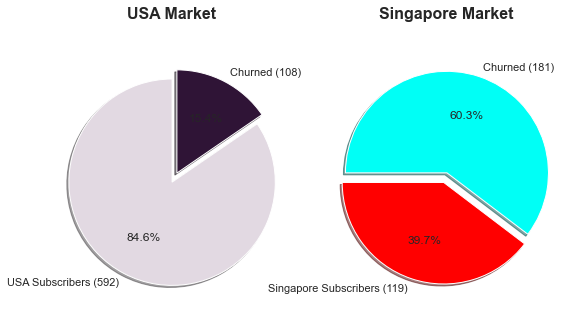

In [100]:
# Market Churn visualization
labels1 = f'USA Subscribers ({subs_usa})', f'Churned ({subs_usa_churn})'
labels1_ = f'Singapore Subscribers ({subs_sg})', f'Churned ({subs_sg_churn})'
explode = (0, 0.1)
theme1 = plt.get_cmap('twilight')
theme2 = plt.get_cmap('hsv')

fig1, (ax1,ax2) = plt.subplots(1,2, figsize=(9, 5))

# ----- Total customers -----
sizes = [subs_usa, subs_usa_churn]
ax1.set_prop_cycle("color", [theme1(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax1.pie(sizes, explode=explode, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("USA Market\n", fontsize=16, fontweight='bold')

sizes = [subs_sg, subs_sg_churn]
ax2.set_prop_cycle("color", [theme2(1. * i / len(sizes))
                             for i in range(len(sizes))])
ax2.pie(sizes, explode=explode, labels=labels1_, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Singapore Market\n", fontsize=16, fontweight='bold')


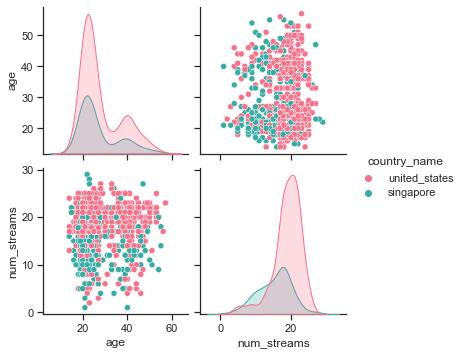

In [101]:
sns.set(style="ticks", color_codes=True)

## make a pair plot
columns = ['age','num_streams']

axes = sns.pairplot(data_2,vars=columns,hue="country_name",palette="husl")

### Summary Question 3

We can infer from the pie plot that Singapore has higher customer churn than USA both in percentage and total numbers
1. Singapore number of churn is 181, higher than USA at 108
2. Singapore % of churn is 60.3%, higher than USA at 108
3. There should be a causal analysis conducted from Singapore customer data to get further insight.